<b> You may skip straight to <u>4. Model Analysis with Impulse Response Function.</u> Other analyses are conducted prior to section 4 for a clearer understanding of the data and model.</b>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.tsa.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1. Loading and preparing the data

In [2]:
# load data
data = pd.read_csv("data.csv")

In [3]:
data.head()

,date,sales,review_num,rating,sentiment
0,2017-10-19,110.00,7.0,4.000000,0.394857
1,2017-10-20,113.77,3.0,4.333333,0.504667
2,2017-10-21,104.93,3.0,3.666667,0.605333
3,2017-10-22,96.37,3.0,2.666667,0.678333
4,2017-10-23,98.00,4.0,4.750000,0.441250


In [4]:
data = data[[a for a in data.columns if a != "date"]] # Remove the date column
data.head()

,sales,review_num,rating,sentiment
0,110.00,7.0,4.000000,0.394857
1,113.77,3.0,4.333333,0.504667
2,104.93,3.0,3.666667,0.605333
3,96.37,3.0,2.666667,0.678333
4,98.00,4.0,4.750000,0.441250


# 2. Find the best order of VAR model for this data

In [5]:
# model determination
model = VAR(data)
print(model.select_order(5).summary())
selected_orders = model.select_order(5).selected_orders
print("Selected orders: ", selected_orders)

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       7.210       7.253       1353.       7.227
1      4.911*      5.123*      135.8*      4.995*
2       4.932       5.314       138.6       5.084
3       4.920       5.472       137.0       5.139
4       4.914       5.636       136.2       5.201
5       4.947       5.839       140.8       5.301
-------------------------------------------------
Selected orders:  {'aic': 1, 'bic': 1, 'hqic': 1, 'fpe': 1}


All measures point towards a VAR model of order 1

# 3. Model analysis (without IRF yet)

In [6]:
# model estimation
results = model.fit(1,trend="nc")
results.summary()

print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 19, Mar, 2019
Time:                     22:45:12
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    5.30297
Nobs:                     372.000    HQIC:                   5.20135
Log likelihood:          -3050.38    FPE:                    169.765
AIC:                      5.13441    Det(Omega_mle):         162.656
--------------------------------------------------------------------
Results for equation sales
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
L1.sales              0.971113         0.015420           62.978           0.000
L1.review_num        -0.145763         0.438789           -0.332           0.740
L1.rating             0.555483         0.804965            0

In [7]:
print("================test_whiteness================\n")
print(results.test_whiteness().summary())

================test_whiteness================

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 10 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value  df
-----------------------------------------
    217.5          173.0       0.000  144
-----------------------------------------


In [8]:
print("================results.roots================\n")
for root in results.roots:
    print(str(root)+",")

================results.roots================

4.267593689609134,
2.6465024341764805,
1.5405215914465378,
1.0063025856336385,


In [9]:
print("\n================is_stable================\n")
print(str(results.is_stable()))


================is_stable================

True


In [10]:
print("\n================granger causality on sales================\n")
print(results.test_causality('sales', ['review_num'],kind='f').summary())
print(results.test_causality('sales', ['rating'],kind='f').summary())
print(results.test_causality('sales', ['sentiment'],kind='f').summary())


================granger causality on sales================

Granger causality F-test. H_0: review_num does not Granger-cause sales. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    0.1104         3.848       0.740  (1, 1472)
-----------------------------------------------
Granger causality F-test. H_0: rating does not Granger-cause sales. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    0.4762         3.848       0.490  (1, 1472)
-----------------------------------------------
Granger causality F-test. H_0: sentiment does not Granger-cause sales. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    0.9972         3.848       0.318  (1, 1472)
-----------------------------

In [11]:
print("\n================granger causality on review_num================\n")
print(results.test_causality('review_num', ['sales'],kind='f').summary())
print(results.test_causality('review_num', ['rating'],kind='f').summary())
print(results.test_causality('review_num', ['sentiment'],kind='f').summary())


================granger causality on review_num================

Granger causality F-test. H_0: sales does not Granger-cause review_num. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    9.453          3.848       0.002  (1, 1472)
-----------------------------------------------
Granger causality F-test. H_0: rating does not Granger-cause review_num. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    3.137          3.848       0.077  (1, 1472)
-----------------------------------------------
Granger causality F-test. H_0: sentiment does not Granger-cause review_num. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
   0.05765         3.848       0.810  (1, 1472)
----------------------

In [12]:
print("\n================granger causality on rating================\n")
print(results.test_causality('rating', ['sales'],kind='f').summary())
print(results.test_causality('rating', ['review_num'],kind='f').summary())
print(results.test_causality('rating', ['sentiment'],kind='f').summary())


================granger causality on rating================

Granger causality F-test. H_0: sales does not Granger-cause rating. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    53.78          3.848       0.000  (1, 1472)
-----------------------------------------------
Granger causality F-test. H_0: review_num does not Granger-cause rating. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    1.456          3.848       0.228  (1, 1472)
-----------------------------------------------
Granger causality F-test. H_0: sentiment does not Granger-cause rating. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    1.227          3.848       0.268  (1, 1472)
----------------------------------

In [13]:
print("\n================granger causality on sentiment================\n")
print(results.test_causality('sentiment', ['sales'],kind='f').summary())
print(results.test_causality('sentiment', ['rating'],kind='f').summary())
print(results.test_causality('sentiment', ['sentiment'],kind='f').summary())


================granger causality on sentiment================

Granger causality F-test. H_0: sales does not Granger-cause sentiment. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    13.76          3.848       0.000  (1, 1472)
-----------------------------------------------
Granger causality F-test. H_0: rating does not Granger-cause sentiment. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    11.34          3.848       0.001  (1, 1472)
-----------------------------------------------
Granger causality F-test. H_0: sentiment does not Granger-cause sentiment. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    9.212          3.848       0.002  (1, 1472)
------------------------------------------

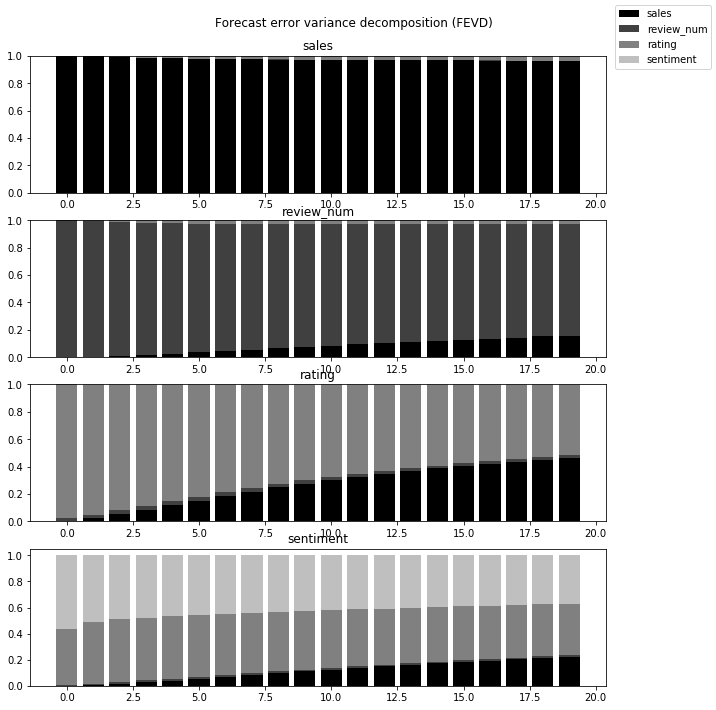

In [14]:
# forecast error decomposition
fevd = results.fevd(5)
answer = results.fevd(20).plot()

# 4. Model Analysis with Impulse Response Function

## 4.1. General IRF

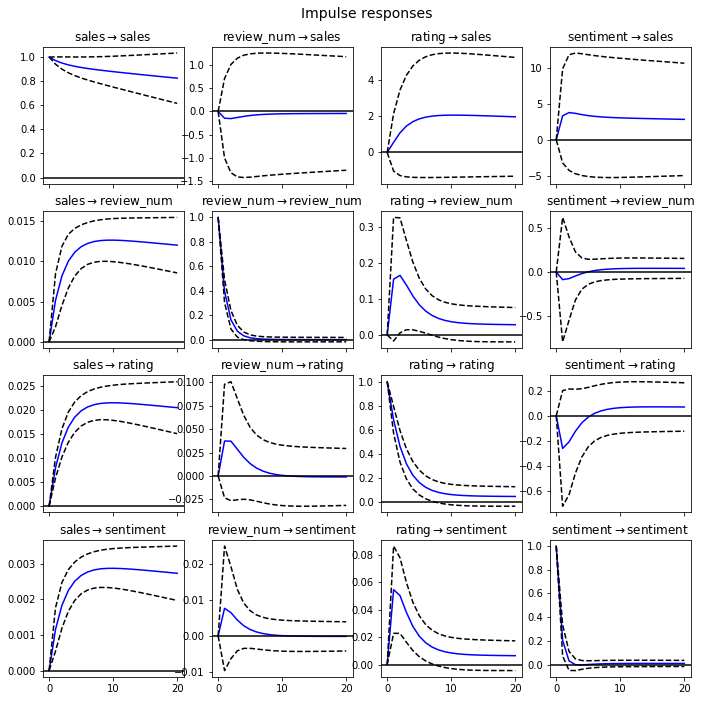

In [15]:
irf = results.irf(20)
irf2 = irf.plot(orth=False)

## 4.2. Cumulative IRF

[[149.48919  -8.1003  347.53191 511.78824]
 [  2.14212   1.58128   5.74025   6.89961]
 [  3.62934  -0.01941  11.51555  11.40032]
 [  0.48527   0.00219   1.3463    2.84247]]


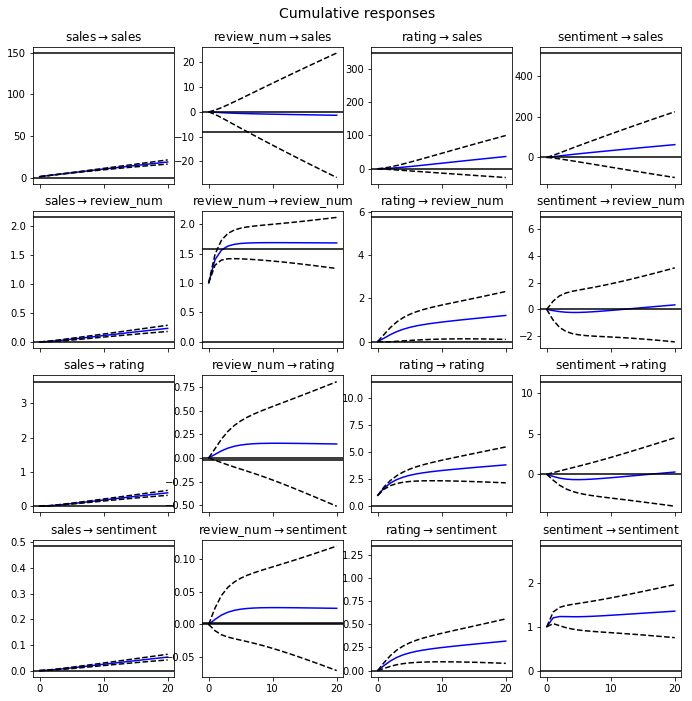

In [18]:
irf.plot_cum_effects(orth=False)
np.set_printoptions(suppress=True, precision = 5) # To better format the results
print(results.long_run_effects())

# References

1. https://www.reddit.com/r/econometrics/comments/2d8uu3/irf_or_oirf/
2. https://newonlinecourses.science.psu.edu/stat510/node/79/
3. https://www.r-econometrics.com/timeseries/varintro/